## ex2. Logistic regression: classification

Build a logistic regression to predict whether a student will be enrolled into a university based on two exam scores.

For the training data(ex2data1.txt), we have the applicant's score on two exams and the admission decision.

#### Input data: ex2data1.txt

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load training data, the first two columns contains the exam score and the third column contains the label
train=pd.read_csv('ex2data1.txt', names=['exam1','exam2', 'result'])
print(train.head(2))
print("")
print(train.tail(2))
print("")
print(train.shape)

       exam1      exam2  result
0  34.623660  78.024693       0
1  30.286711  43.894998       0

        exam1      exam2  result
98  55.340018  64.931938       1
99  74.775893  89.529813       1

(100, 3)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
exam1     100 non-null float64
exam2     100 non-null float64
result    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [6]:
train.describe()

,exam1,exam2,result
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [7]:
# There is almost no linear relationship between the two exams score. This can also be seen from the scatter plot
np.corrcoef(train['exam1'], train['exam2'])

array([[ 1.        , -0.02366459],
       [-0.02366459,  1.        ]])

Text(0,0.5,'exam2')

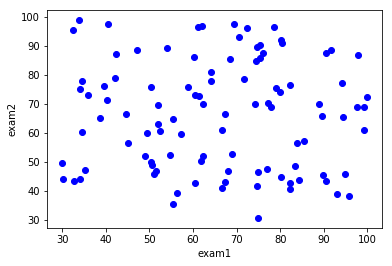

In [14]:
plt.plot(train['exam1'], train['exam2'], 'bo')
plt.xlabel('exam1')
plt.ylabel('exam2')

In [30]:
X=train[['exam1','exam2']]
y=train['result']
m,n=X.shape
X1=pd.concat((pd.DataFrame(np.ones((m,1))), X), axis=1) # add x0=1 for X
m,n=X1.shape

### Part I: Visualization: plot

we start by plotting the data we are working with

Text(0.5,1,'Figure1: Scatter plot of the training data')

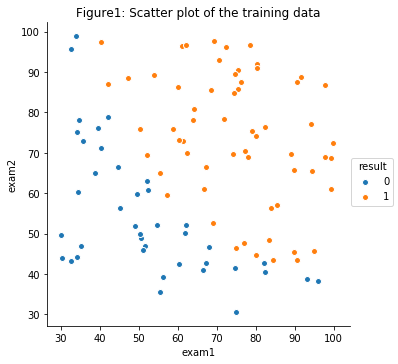

In [31]:
sns.pairplot(x_vars='exam1', y_vars='exam2', data=train, kind='scatter', hue='result', size=5)
plt.title('Figure1: Scatter plot of the training data')

### Part II: Implementation

#### 2.1 Sigmoid function (logistic function)

h_theta(x)=g(theta'*x)=1/(1+exp(-theta'*x))

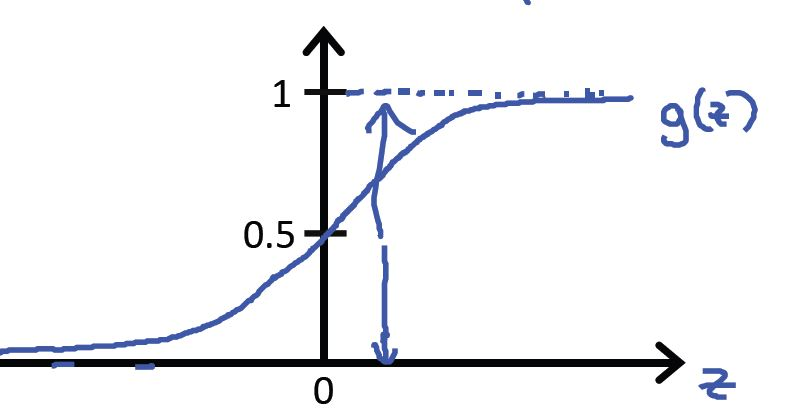

In [19]:
from IPython.display import Image
Image(filename="C:/Users/jzhang11/Documents/Python Scripts/stanford/pic/sigmoid.jpg", height=130, width=300)


The value for sigmoid(0) is:  0.5


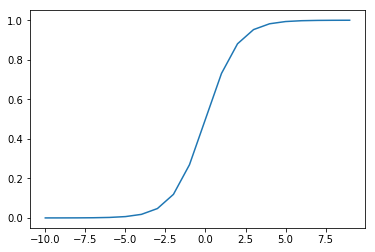

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-1*z))
    """
    SIGMOID Compute sigmoid function
    g = SIGMOID(z) computes the sigmoid of z.
    Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).
    """  
# Test of the sigmoid function
print('The value for sigmoid(0) is: ', sigmoid(0))
x=np.arange(-10, 10)
y=sigmoid(x)
plt.plot(x,y)

##### Interpretation of the hypothesis output
h_theta(x)=P(y=1|X,theta)=estimated probability that y=1 on input x

##### Decision boundary
Suppose the threshold is 0.5

Predict y=1 if h_theta(x)>=0.5, theta'x>=0

Predict y=0 if h_theta(x)<0.5, theta'x<0

#### 2.2 Cost function and gradient

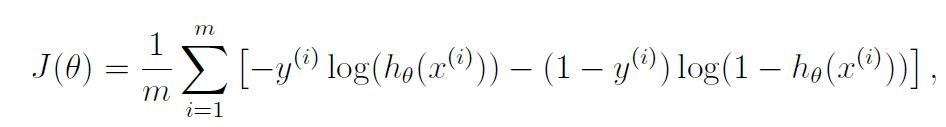

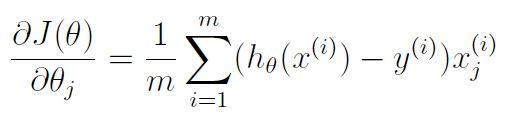

In [33]:
from IPython.display import Image, display
display(Image(filename='C:/Users/jzhang11/Documents/Python Scripts/stanford/pic/logistic_cost.jpg', height=100, width=500))
display(Image(filename='C:/Users/jzhang11/Documents/Python Scripts/stanford/pic/logistic_grad.jpg', height=100, width=300))

In [33]:
def costFunction(theta, X, y):
    """
    COSTFUNCTION Compute cost and gradient for logistic regression
    J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the parameter for logistic regression 
    and the gradient of the cost w.r.t. to the parameters.
    """

    # Initialize some useful values
    m = len(y)
    grad = np.zeros(len(theta))

    # Compute the cost of a particular choice of theta. You should set J to the cost.
    # Compute the partial derivatives and set grad to the partial derivatives of the cost w.r.t. each parameter in theta
    J=(-y.T.dot(np.log(sigmoid(X.dot(theta))))-(1-y).T.dot(np.log(1-sigmoid(X.dot(theta)))))/m
    grad=X.T.dot((sigmoid(X.dot(theta))-np.array(y).reshape(m,1)))/m
    return (J,grad)

In [34]:
# Initialize fitting parameters
initial_theta = np.zeros((n, 1))

# Compute and display initial cost and gradient
[cost1, grad1] = costFunction(initial_theta, X1, y)
print(cost1)
grad1

0    0.693147
Name: result, dtype: float64


,0
0,-0.100000
exam1,-12.009217
exam2,-11.262842


In [36]:
print('Cost at initial theta (zeros):', np.round(cost1.iloc[0], decimals=3))
print('Expected cost (approx): 0.693')
print("")
print('Gradient at initial theta (zeros): \n');
print(grad1)
print('\nExpected gradients (approx):\n-0.1000\n -12.0092\n -11.2628')
print("")

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros): 

               0
0      -0.100000
exam1 -12.009217
exam2 -11.262842

Expected gradients (approx):
-0.1000
 -12.0092
 -11.2628



In [38]:
# Compute and display cost and gradient with non-zero theta
test_theta=np.array([-24, 0.2, 0.2]).reshape(3,1)
[cost2,grad2]=costFunction(test_theta, X1, y)
print('Cost at test theta: ', cost2.iloc[0])
print('Expected cost (approx): 0.218\n')
print('Gradient at test theta: ')
print(grad2)
print('\nExpected gradients (approx):\n 0.043\n 2.566\n 2.647\n')

Cost at test theta:  0.21833019382659796
Expected cost (approx): 0.218

Gradient at test theta: 
              0
0      0.042903
exam1  2.566234
exam2  2.646797

Expected gradients (approx):
 0.043
 2.566
 2.647



#### 2.3 Advanced Optimization to find learning parameter. 

Optimization algorithm

Cost function is J_theta. And we want to minimize J_theta. 

We will pass the optimization algorithm

1. The initial values of the parameters we are trying to optimize theta

2. Given the training set (X,y) we have the code to compute the J, grad with respect to theta data (X,y)

For Python, we will use the scipy.optimize. 

In [39]:
import numpy as np
import scipy.optimize as op

X1=np.array(X1)
y=np.array(y)

def Sigmoid(z):
    return 1/(1 + np.exp(-z));

def Gradient(theta,x,y):
    m , n = x.shape
    theta = theta.reshape((n,1));
    y = y.reshape((m,1))
    sigmoid_x_theta = Sigmoid(x.dot(theta));
    grad = ((x.T).dot(sigmoid_x_theta-y))/m;
    return grad.flatten();

def CostFunc(theta,x,y):
    m,n = x.shape; 
    theta = theta.reshape((n,1));
    y = y.reshape((m,1));
    term1 = np.log(Sigmoid(x.dot(theta)));
    term2 = np.log(1-Sigmoid(x.dot(theta)));
    term1 = term1.reshape((m,1))
    term2 = term2.reshape((m,1))
    term = y * term1 + (1 - y) * term2; #dot product
    J = -((np.sum(term))/m);
    return J;

m , n = X1.shape;
initial_theta = np.zeros(n);
Result = op.minimize(fun = CostFunc, x0 = initial_theta, args = (X1, y), method = 'TNC',jac = Gradient);
optimal_theta = Result.x;     
optimal_theta

array([-25.16131853,   0.20623159,   0.20147149])

In [44]:
# Plot decision boundary theta'X=0. The decision is sigmoid(theta'*X)=0.5, thus theta'*X=0
# thus theta0+theta1*x1+theta2*x2=0, x2=-(theta0+theta1*x1)/theta2
def plotDecisionBoundary(theta, X, y, train):
    """
    PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with the decision boundary defined by theta
    PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the positive examples and o 
    for the negative examples. 
    1) Mx3 matrix, where the first column is an all-ones column for the intercept.
    2) MxN, N>3 matrix, where the first column is all-ones
    """
    sns.pairplot(x_vars='exam1', y_vars='exam2', data=train, hue='result', size=5)
    
    # Only need 2 points to define a line, so choose two endpoints
    plot_x = np.array([min(X[:,1])-2,  max(X[:,1])+2])

    # Calculate the decision boundary line
    plot_y = (-1./optimal_theta[2]*(optimal_theta[1]*plot_x + optimal_theta[0]))
    plt.plot(plot_x, plot_y, label='decision boundary')
    plt.legend(loc='upper right')
                    

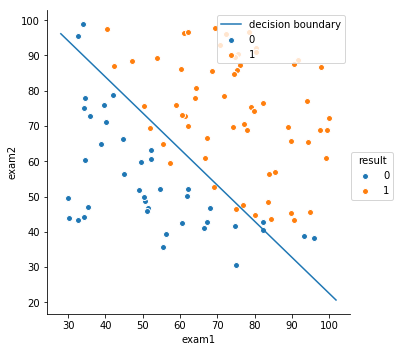

In [45]:
plotDecisionBoundary(optimal_theta, X1, y, train)

In [82]:
# Plot decision boundary theta'X=0

def plotDecisionBoundary(theta, X, y, train):
    """
    PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with the decision boundary defined by theta
    PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the positive examples and o 
    for the negative examples. 
    1) Mx3 matrix, where the first column is an all-ones column for the intercept.
    2) MxN, N>3 matrix, where the first column is all-ones
    """
    plt.figure(figsize=(8,5))  #inches
    plt.scatter(x=train['exam1'][train['result']==1], y=train['exam2'][train['result']==1], c='k', marker='+', label='Admitted')
    plt.scatter(x=train['exam1'][train['result']==0], y=train['exam2'][train['result']==0],c='y', marker='o', label='Not Admitted')
    # Only need 2 points to define a line, so choose two endpoints
    plot_x = np.array([min(X[:,1])-2,  max(X[:,1])+2])

    # Calculate the decision boundary line
    plot_y = (-1./optimal_theta[2]*(optimal_theta[1]*plot_x + optimal_theta[0]))
    plt.plot(plot_x, plot_y, label='decision boundary')
    plt.legend(loc='lower left')

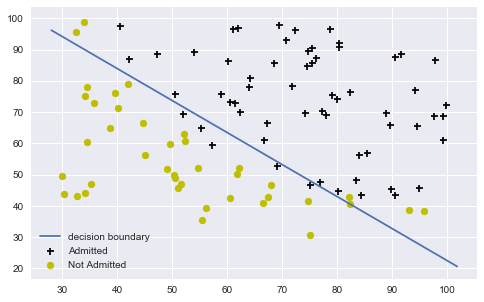

In [83]:
plotDecisionBoundary(optimal_theta, X1, y, train)

#### 2.4 Evaluate a logistic regression

In [46]:
# Predict whether a student with exam1 45 and exam2 85 will be admiteed or not
y_pred=Sigmoid(np.sum(optimal_theta*([1,45,85])))
print('Expected admission rate using scipy.optimize is:', np.round(y_pred, 3))
print('Admission rate using Matlab fminunc:', 0.776)

Expected admission rate using scipy.optimize is: 0.776
Admission rate using Matlab fminunc: 0.776


The predict function will produce 1 or 0 predictions given a dataset and a learned parameter
vector of theta. 

In [52]:
def predict(theta, X):
    """
    PREDICT Predict whether the label is 0 or 1 using learned logistic regression parameters theta
    p = PREDICT(theta, X) computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
    """
    m,n = X.shape
    p = np.zeros((m, 1))
    theta_x=X.dot(theta.reshape(n,1))
    prob=Sigmoid(theta_x)
    p=(prob>=0.5).astype(int)
    return p


In [53]:
p=predict(optimal_theta, X1)

In [54]:
print('Train Accuracy:', np.mean((p.reshape(100,)==y).astype(int)) * 100);
print('Expected accuracy (approx): 89.0\n');

Train Accuracy: 89.0
Expected accuracy (approx): 89.0

